In [224]:
# Packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import datetime as D
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

## Récupération des données

In [225]:
#Récupération des données excel
path = r"/Users/thomascgd/Desktop/Esilv/A5/PI2/DataProjet_V1.xlsx"
data = pd.read_excel(path)

#Réindexation
data.index=data['Date']
del data['Date']


#récupération du S&P 500
SnP = yf.download('^GSPC',"2000-01-01","2023-12-31")

#SnP
data

[*********************100%%**********************]  1 of 1 completed


,Bloomberg Barclays Global Aggregate Bond,Bloomberg Barclays Emerging Markets USD Aggregate,Bloomberg Commodity Index,Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD,Bloomberg Barclays Pan-European High Yield Hedged to USD,Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD,Bloomberg Barclays US Corporate,Bloomberg Barclays US Corporate High Yield,Bloomberg Barclays US Government Inflation-Linked 7 to 10 Years
Date,,,,,,,,,
2017-01-06,451.2591,1021.6870,176.6631,242.01,386.64,693.4913,2735.61,1831.42,295.395
2017-01-13,453.4327,1023.9043,179.0589,242.24,387.06,695.2612,2742.45,1835.04,296.871
2017-01-20,452.4924,1022.2497,178.7389,241.52,387.79,692.3600,2730.89,1833.88,296.281
2017-01-27,452.9716,1025.1906,177.9497,241.29,388.49,690.1031,2733.45,1841.42,296.893
2017-02-03,456.0482,1030.4708,177.8983,242.08,388.88,689.9425,2729.23,1847.56,296.384
...,...,...,...,...,...,...,...,...,...
2022-12-02,451.8751,1078.1550,248.6778,263.86,477.37,750.5967,3031.11,2220.00,349.746
2022-12-09,451.5544,1078.5880,242.9404,263.98,476.15,748.7644,3023.18,2215.70,342.335
2022-12-16,451.1433,1083.7040,245.2675,261.52,474.42,744.9739,3039.66,2216.33,341.426


## Risk Factor Lens

In [226]:
Lens=pd.DataFrame(index=data.index,columns=['Rates','Equity','Credit','Commodity'])

Lens['Rates']=data['Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD ']
Lens['Credit']=data['Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD']
Lens['Commodity']=data['Bloomberg Commodity Index']

for date in Lens.index:
    if date in SnP.index:
        Lens.loc[date,'Equity']=SnP.loc[date,'Adj Close']
        
# Nettoyage car SnP index n'a pas toute les dates demandées
Lens=Lens.dropna()

# Calcul des rendements
for col in Lens.columns:
    Lens[col]=Lens[col].pct_change()

# ajustement des rendements  
for col in Lens.columns:
    Lens[col]=Lens[col].values.reshape(-1,1)

# nettoyage
Lens=Lens.dropna()

Lens

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,-0.002972,-0.001787
2017-01-27,-0.003260,0.010294,-0.000952,-0.004415
2017-02-03,-0.000233,0.001190,0.003274,-0.000289
2017-02-10,0.002823,0.008131,0.004090,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.007330,-0.003078
2022-12-09,-0.002441,-0.033725,0.000455,-0.023072
2022-12-16,-0.005062,-0.020847,-0.009319,0.009579


In [14]:
# Chemin du fichier CSV
chemin_fichier_csv = '/Users/thomascgd/Desktop/Esilv/A5/PI2/Data_Lens_Macro_Return.csv'

Lens.to_csv(chemin_fichier_csv,index=True)


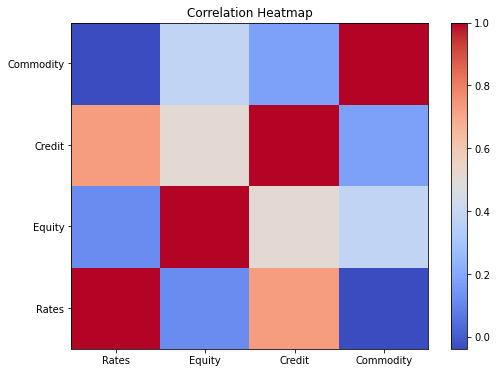

In [227]:
#corrélation
b=Lens.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(b, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(b.columns), 1), b.columns)
plt.yticks(np.arange(0.5, len(b.index), 1), b.columns)


plt.title('Correlation Heatmap')
plt.show()

In [228]:
b

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,0.730541,-0.037741
Equity,0.118621,1.000000,0.510468,0.382100
Credit,0.730541,0.510468,1.000000,0.176523
Commodity,-0.037741,0.382100,0.176523,1.000000


## ACP

Variance expliquée cumulée :
[0.69404423 0.95675739 0.99534101 1.        ]

Nombre de composantes principales pour 95.0% de variance expliquée : 2


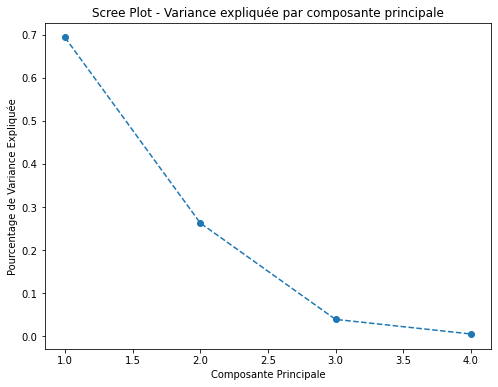


Résultats de l'ACP :
        PC1       PC2
0 -0.002967  0.012144
1  0.004992 -0.000736
2 -0.004402 -0.008570
3  0.001239 -0.001197
4 -0.012585  0.010106


In [229]:
# Instanciation de l'objet PCA
pca = PCA()

# Appliquer PCA sur les données standardisées
pca_result = pca.fit_transform(Lens)

# Proportion de variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage du pourcentage de variance expliquée cumulatif
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Variance expliquée cumulée :")
print(cumulative_explained_variance)

# Nombre de composantes principales à retenir en fonction du pourcentage de variance expliquée
threshold_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1
print(f"\nNombre de composantes principales pour {threshold_variance * 100}% de variance expliquée : {num_components}")

# Affichage du scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Variance expliquée par composante principale')
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.show()

# Projection des données dans l'espace des composantes principales
df_pca = pd.DataFrame(pca_result[:, :num_components], columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Affichage des résultats
print("\nRésultats de l'ACP :")
print(df_pca.head())

plt.show()

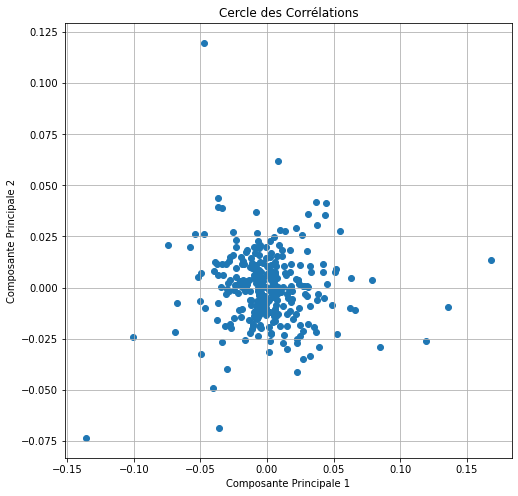

In [230]:
# Affichage du cercle des corrélations
plt.figure(figsize=(8, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Cercle des Corrélations')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

#for i, variable in enumerate(Lens.columns):
#    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, variable, color='g')

plt.grid(True)
plt.show()

## Exponentially-weighted regression

In [231]:
Lens_adj=Lens.copy(deep=True)
Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,-0.002972,-0.001787
2017-01-27,-0.003260,0.010294,-0.000952,-0.004415
2017-02-03,-0.000233,0.001190,0.003274,-0.000289
2017-02-10,0.002823,0.008131,0.004090,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.007330,-0.003078
2022-12-09,-0.002441,-0.033725,0.000455,-0.023072
2022-12-16,-0.005062,-0.020847,-0.009319,0.009579


In [232]:
# Define the rolling window size
rolling_window = 51  # Assuming weekly returns with approximately 252 trading days in a year

# Exponentially weighted residualization process using pd.ewm() and pd.DataFrame.rolling()
def ewm_residualize(donnees, dependent_column, independent_columns, span):
    result = pd.DataFrame(index=donnees.index)
    
    for col in independent_columns:
        # Calculate EWMA of the independent variable
        ewma_x = donnees[col].ewm(span=span).mean()

        # Calculate EWMA of the dependent variable
        ewma_y = donnees[dependent_column].ewm(span=span).mean()

        # Calculate residuals using rolling regression
        residuals = donnees[dependent_column] - ewma_y
        for i in range(rolling_window, len(donnees)):
            window_data = donnees[i - rolling_window:i + 1]
            window_ewma_x = ewma_x[i - rolling_window:i + 1]

            # Rolling regression to calculate residuals
            X = np.column_stack((np.ones_like(window_ewma_x), window_ewma_x))
            beta = np.linalg.lstsq(X, window_data[dependent_column], rcond=None)[0]
            residuals.iloc[i] = window_data[dependent_column].iloc[-1] - np.dot(X[-1, :], beta)

        result[col + '_residual'] = residuals
    
    return result

In [233]:
#Test sur la colonne Credit

# Apply exponentially weighted residualization to Credit returns with Interest Rates and Equity
span_parameter = 20  # Adjust span parameter based on preferences
residualized_data = ewm_residualize(Lens_adj, 'Credit', ['Rates', 'Equity'], span_parameter)

# Display the results
print(residualized_data)

            Rates_residual  Equity_residual
Date                                       
2017-01-13        0.000000         0.000000
2017-01-20       -0.001863        -0.001863
2017-01-27        0.000099         0.000099
2017-02-03        0.003077         0.003077
2017-02-10        0.002951         0.002951
...                    ...              ...
2022-12-02        0.000877         0.005281
2022-12-09       -0.005108         0.000651
2022-12-16       -0.012564        -0.007435
2022-12-23       -0.008183        -0.006743
2022-12-30       -0.001551        -0.001520

[302 rows x 2 columns]


In [234]:
span_parameter = 20  # Adjust span parameter based on preferences
#residualized_data = ewm_residualize(Returns, 'Credit', ['Rates', 'Equity'], span_parameter)
for i in range(2,len(Lens_adj.columns)):
    residualized_data = ewm_residualize(Lens_adj, Lens_adj.columns[i], ['Rates', 'Equity'], span_parameter)
    for d in Lens_adj.index:
        for j in residualized_data.columns:
            Lens_adj['Credit'].loc[d]=Lens_adj['Credit'].loc[d]-residualized_data[j].loc[d]

Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,0.015335,-0.001787
2017-01-27,-0.003260,0.010294,0.011403,-0.004415
2017-02-03,-0.000233,0.001190,0.000179,-0.000289
2017-02-10,0.002823,0.008131,-0.024477,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072
2022-12-16,-0.005062,-0.020847,0.008012,0.009579


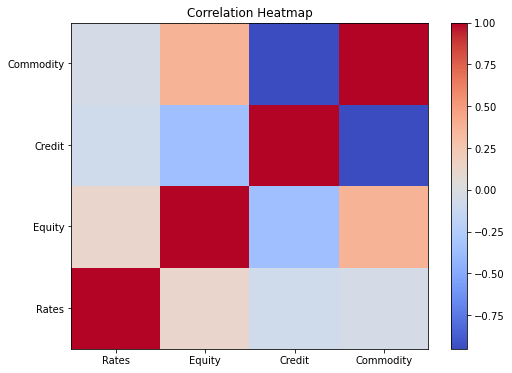

In [235]:
#corrélation
c=Lens_adj.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(c, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(c.columns), 1), c.columns)
plt.yticks(np.arange(0.5, len(c.index), 1), c.columns)


plt.title('Correlation Heatmap')
plt.show()

In [236]:
b

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,0.730541,-0.037741
Equity,0.118621,1.000000,0.510468,0.382100
Credit,0.730541,0.510468,1.000000,0.176523
Commodity,-0.037741,0.382100,0.176523,1.000000


In [237]:
c

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,-0.066874,-0.037741
Equity,0.118621,1.000000,-0.363376,0.382100
Credit,-0.066874,-0.363376,1.000000,-0.950404
Commodity,-0.037741,0.382100,-0.950404,1.000000


## GMM

In [238]:
# Création des dataset pour s'entrainer et tester
df_train = Lens_adj[Lens_adj.index<pd.to_datetime('2019-01-01')]
df_test = Lens_adj[Lens_adj.index>pd.to_datetime('2019-01-01')]

num_states = 4  # Définissez le nombre d'états de marché
model = GaussianMixture(n_components=num_states)

# Ajustez le modèle
model.fit(df_train)

# 4. Identification des états de marché
market_states = model.predict(df_test)
Proba_market_states=model.predict_proba(df_test)

# Ajoutez les états de marché en tant que colonne dans les données
res=np.column_stack((df_test, market_states,Proba_market_states))
res=pd.DataFrame(res,index=df_test.index,columns=['Rates','Equity','Credit','Commodity','Market_State','0','1','2','3'])
res

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.002882,0.018586,-0.036202,0.010058,1.0,2.067990e-03,8.226967e-01,4.527992e-05,0.175190
2019-01-11,-0.000478,0.025403,-0.044998,0.017411,2.0,2.153660e-02,6.456291e-03,8.847456e-01,0.087262
2019-01-18,-0.000002,0.028676,-0.049990,0.022042,2.0,5.096639e-04,4.238406e-06,9.982776e-01,0.001209
2019-01-25,0.003968,-0.002228,-0.000774,-0.003338,0.0,9.641685e-01,2.876893e-04,5.434817e-11,0.035544
2019-02-01,0.002727,0.015675,-0.004078,-0.000820,0.0,9.755065e-01,1.424720e-07,6.506157e-08,0.024493
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078,3.0,3.503355e-01,2.713843e-01,4.878949e-10,0.378280
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072,3.0,4.478727e-08,1.010484e-46,6.582470e-45,1.000000
2022-12-16,-0.005062,-0.020847,0.008012,0.009579,3.0,1.015774e-03,1.043515e-02,2.935778e-13,0.988549


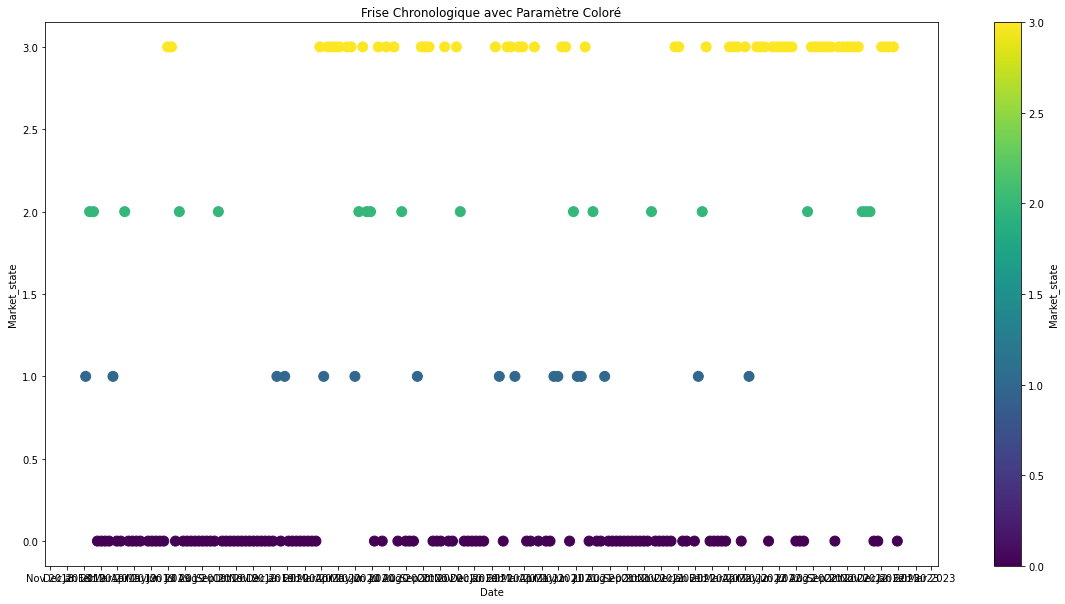

In [239]:
# Normalisation du paramètre pour l'utilisation des couleurs
norm = Normalize(vmin=res['Market_State'].min(), vmax=res['Market_State'].max())
colors = [plt.cm.viridis(norm(value)) for value in res['Market_State']]

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(20, 10))

# Tracer la frise chronologique
scatter = ax.scatter(res.index, res['Market_State'], c=colors, marker='o', s=100)

# Ajouter une barre de couleur
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax)
cbar.set_label('Market_state')

# Formattage des dates sur l'axe x
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Ajouter des titres et des labels
ax.set_title('Frise Chronologique avec Paramètre Coloré')
ax.set_xlabel('Date')
ax.set_ylabel('Market_state')

# Afficher la frise chronologique
plt.show()


In [240]:
res

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.002882,0.018586,-0.036202,0.010058,1.0,2.067990e-03,8.226967e-01,4.527992e-05,0.175190
2019-01-11,-0.000478,0.025403,-0.044998,0.017411,2.0,2.153660e-02,6.456291e-03,8.847456e-01,0.087262
2019-01-18,-0.000002,0.028676,-0.049990,0.022042,2.0,5.096639e-04,4.238406e-06,9.982776e-01,0.001209
2019-01-25,0.003968,-0.002228,-0.000774,-0.003338,0.0,9.641685e-01,2.876893e-04,5.434817e-11,0.035544
2019-02-01,0.002727,0.015675,-0.004078,-0.000820,0.0,9.755065e-01,1.424720e-07,6.506157e-08,0.024493
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078,3.0,3.503355e-01,2.713843e-01,4.878949e-10,0.378280
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072,3.0,4.478727e-08,1.010484e-46,6.582470e-45,1.000000
2022-12-16,-0.005062,-0.020847,0.008012,0.009579,3.0,1.015774e-03,1.043515e-02,2.935778e-13,0.988549



 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 108
            Rates      Equity      Credit   Commodity
count  108.000000  108.000000  108.000000  108.000000
mean     0.000356    0.005147    0.003668    0.001188
std      0.004850    0.015343    0.029421    0.016056
min     -0.013309   -0.031003   -0.101372   -0.042118
25%     -0.002356   -0.006002   -0.016909   -0.008956
50%      0.000449    0.006311    0.003651    0.001501
75%      0.003362    0.015716    0.020834    0.011041
max      0.012302    0.049147    0.085392    0.056948

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 16
           Rates     Equity     Credit  Commodity
count  16.000000  16.000000  16.000000  16.000000
mean    0.000754   0.002757  -0.019895   0.013680
std     0.005486   0.010839   0.012511   0.007161
min    -0.011104  -0.018705  -0.037956  -0.002378
25%    -0.000109  -0.001481  -0.028201   0.009845
50%     0.001607   0.0059

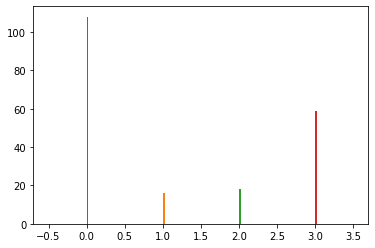

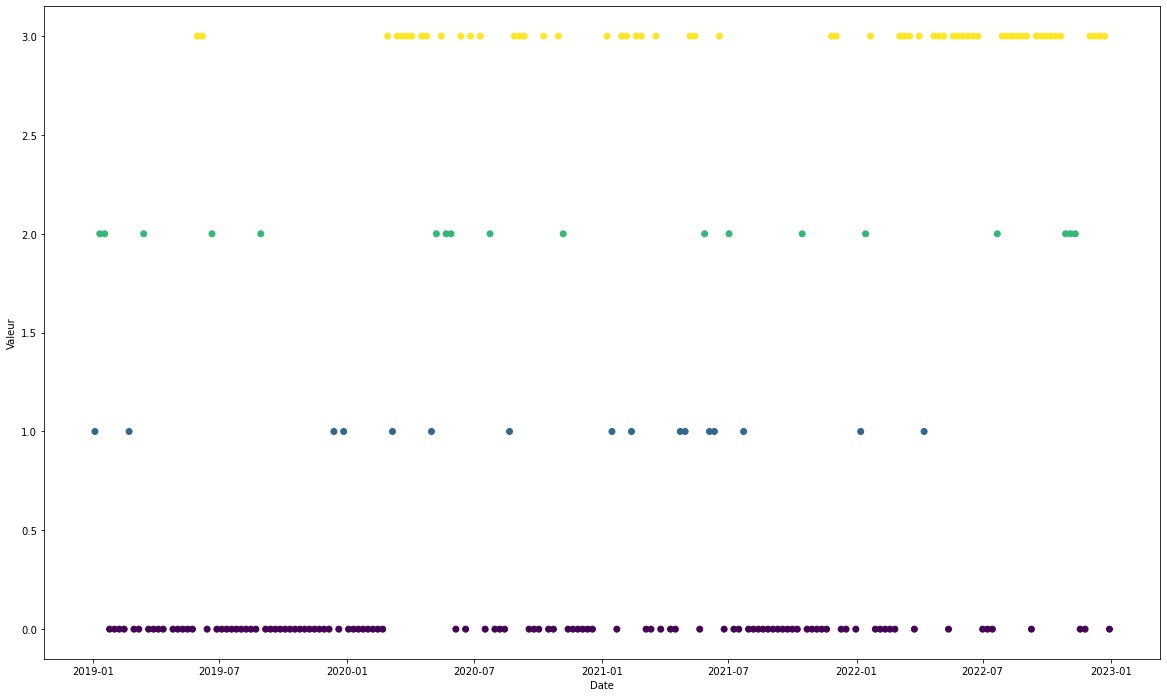

In [241]:
# Affichez les statistiques des différents états de marché
for state in range(num_states):
    state_data = res[res['Market_State'] == state]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close 
    plt.hist(state_data['Market_State'], bins=40, density=False)

plt.figure(1)
plt.figure(figsize=(20, 12)) 
plt.scatter(res.index,res['Market_State'], c=res['Market_State'])
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

In [242]:
#Résultats en pourcentage
res_pct=res.copy(deep=True)

for col in res_pct.columns:
    res_pct[col]=res_pct[col]*100

res_pct

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.288249,1.858600,-3.620152,1.005805,100.0,0.206799,8.226967e+01,4.527992e-03,17.519003
2019-01-11,-0.047820,2.540347,-4.499839,1.741052,200.0,2.153660,6.456291e-01,8.847456e+01,8.726151
2019-01-18,-0.000230,2.867585,-4.999019,2.204157,200.0,0.050966,4.238406e-04,9.982776e+01,0.120852
2019-01-25,0.396802,-0.222785,-0.077369,-0.333833,0.0,96.416847,2.876893e-02,5.434817e-09,3.554384
2019-02-01,0.272690,1.567496,-0.407847,-0.082037,0.0,97.550650,1.424720e-05,6.506157e-06,2.449329
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.772715,1.132103,3.074659,-0.307763,300.0,35.033552,2.713843e+01,4.878949e-08,37.828018
2022-12-09,-0.244112,-3.372549,6.797315,-2.307162,300.0,0.000004,1.010484e-44,6.582470e-43,99.999996
2022-12-16,-0.506234,-2.084694,0.801156,0.957889,300.0,0.101577,1.043515e+00,2.935778e-11,98.854908



 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 108
            Rates      Equity      Credit   Commodity
count  108.000000  108.000000  108.000000  108.000000
mean     0.035624    0.514671    0.366769    0.118824
std      0.485006    1.534270    2.942111    1.605601
min     -1.330905   -3.100277  -10.137170   -4.211817
25%     -0.235565   -0.600211   -1.690917   -0.895645
50%      0.044903    0.631099    0.365082    0.150124
75%      0.336234    1.571621    2.083358    1.104116
max      1.230235    4.914738    8.539153    5.694800

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 16
           Rates     Equity     Credit  Commodity
count  16.000000  16.000000  16.000000  16.000000
mean    0.075426   0.275687  -1.989453   1.367986
std     0.548605   1.083932   1.251117   0.716134
min    -1.110449  -1.870479  -3.795554  -0.237777
25%    -0.010916  -0.148119  -2.820094   0.984463
50%     0.160704   0.5984

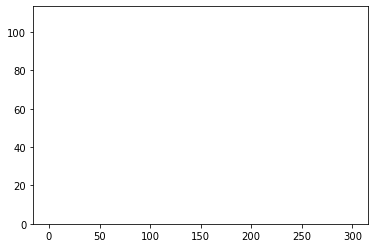

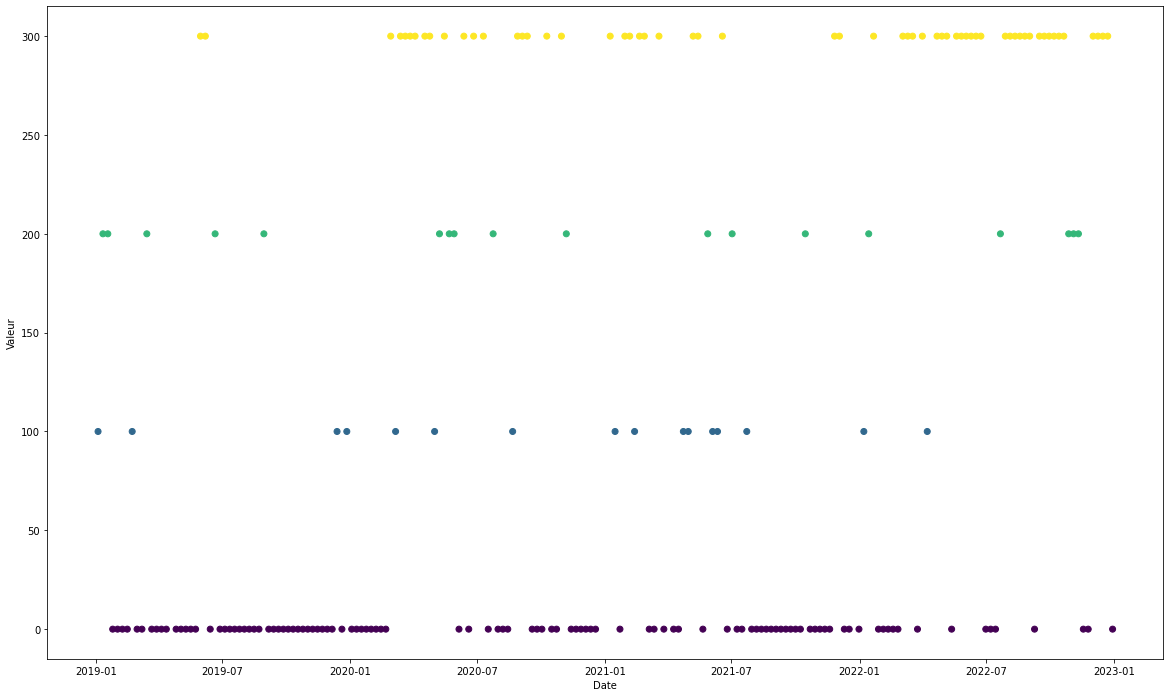

In [244]:
# Affichez les statistiques des différents états de marché
for state in range(num_states):
    state_data = res_pct[res_pct['Market_State'] == state*100]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close 
    plt.hist(state_data['Market_State'], bins=40, density=False)

plt.figure(1)
plt.figure(figsize=(20, 12)) 
plt.scatter(res_pct.index,res_pct['Market_State'], c=res_pct['Market_State'])
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()